# Visualization

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv('data_of_terrorism_after_cleaning.csv')


In [3]:
df.drop(columns = 'Unnamed: 0', inplace=True, axis=1)

#### Color list for visualizations

In [4]:
Red_colors = ["maroon","firebrick","red","indianred", "lightcoral", "salmon", "tomato", "coral","darksalmon","orangered","chocolate","orange", "pink", "sienna", "tan", "saddlebrown", "peru", "rosybrown", "plum", "palevioletred", "deeppink", "mediumvioletred", "hotpink" ]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28614 entries, 0 to 28613
Data columns (total 25 columns):
CITY                                         28614 non-null object
COUNTRY                                      28614 non-null int64
Claimed Responsibility                       28614 non-null int64
DATE                                         28614 non-null float64
FATALITIES                                   28614 non-null int64
Group Name of Perpetrator Group              14608 non-null object
Hostages                                     28614 non-null float64
INJURED                                      28614 non-null int64
LOCATION DETAILS                             13153 non-null object
Name of Entity                               28614 non-null object
Nationality of Target                        28614 non-null object
Number of Perpetrator Fatalities             28614 non-null int64
PERPETRATOR GROUP                            14608 non-null object
PROVINCE/ADMINISTRATIVE

Text(0.5,1,'Number of terrorist attacks by country')

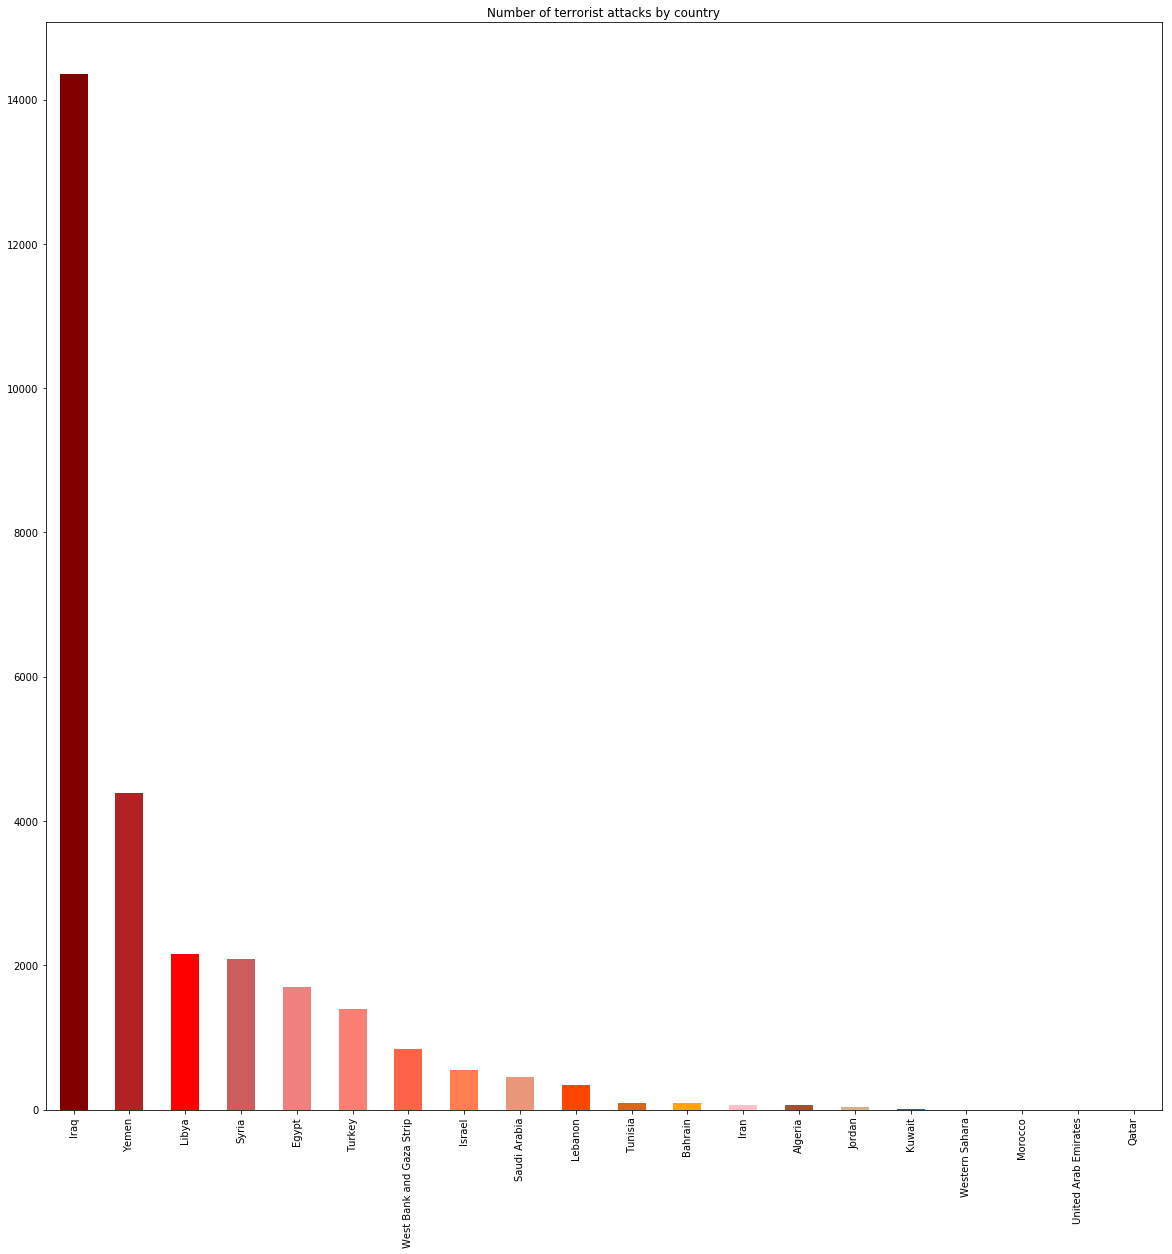

In [7]:
dict_of_countries = {0 : 'Iraq' ,1 : 'Syria',2 : 'Yemen',3 : 'Egypt',4 : 'Saudi Arabia',5 : 'Israel',6 : 'Libya',7 : 'West Bank and Gaza Strip',8 : 'Turkey',9 : 'Lebanon',10 : 'Jordan',11 : 'Tunisia',12 : 'Iran',13 : 'Morocco',14 : 'Algeria',15 : 'Western Sahara',16 : 'Bahrain',17 : 'Kuwait',18 : 'Qatar',19 : 'United Arab Emirates'} 
countries = ['Iraq', 'Syria','Yemen', 'Egypt','Saudi Arabia', 'Israel', 'Libya', 'West Bank and Gaza Strip', 'Turkey', 'Lebanon', 'Jordan', 'Tunisia', 'Iran', 'Morocco', 'Algeria', 'Western' 'Sahara', 'Bahrain', 'Kuwait', 'Qatar', 'United Arab Emirates']
df["COUNTRY"].replace(dict_of_countries).value_counts().plot(kind='bar',color = Red_colors,figsize=(20, 20))
plt.title('Number of terrorist attacks by country')

Text(0.5,1,'Number of terrorist attacks by country')

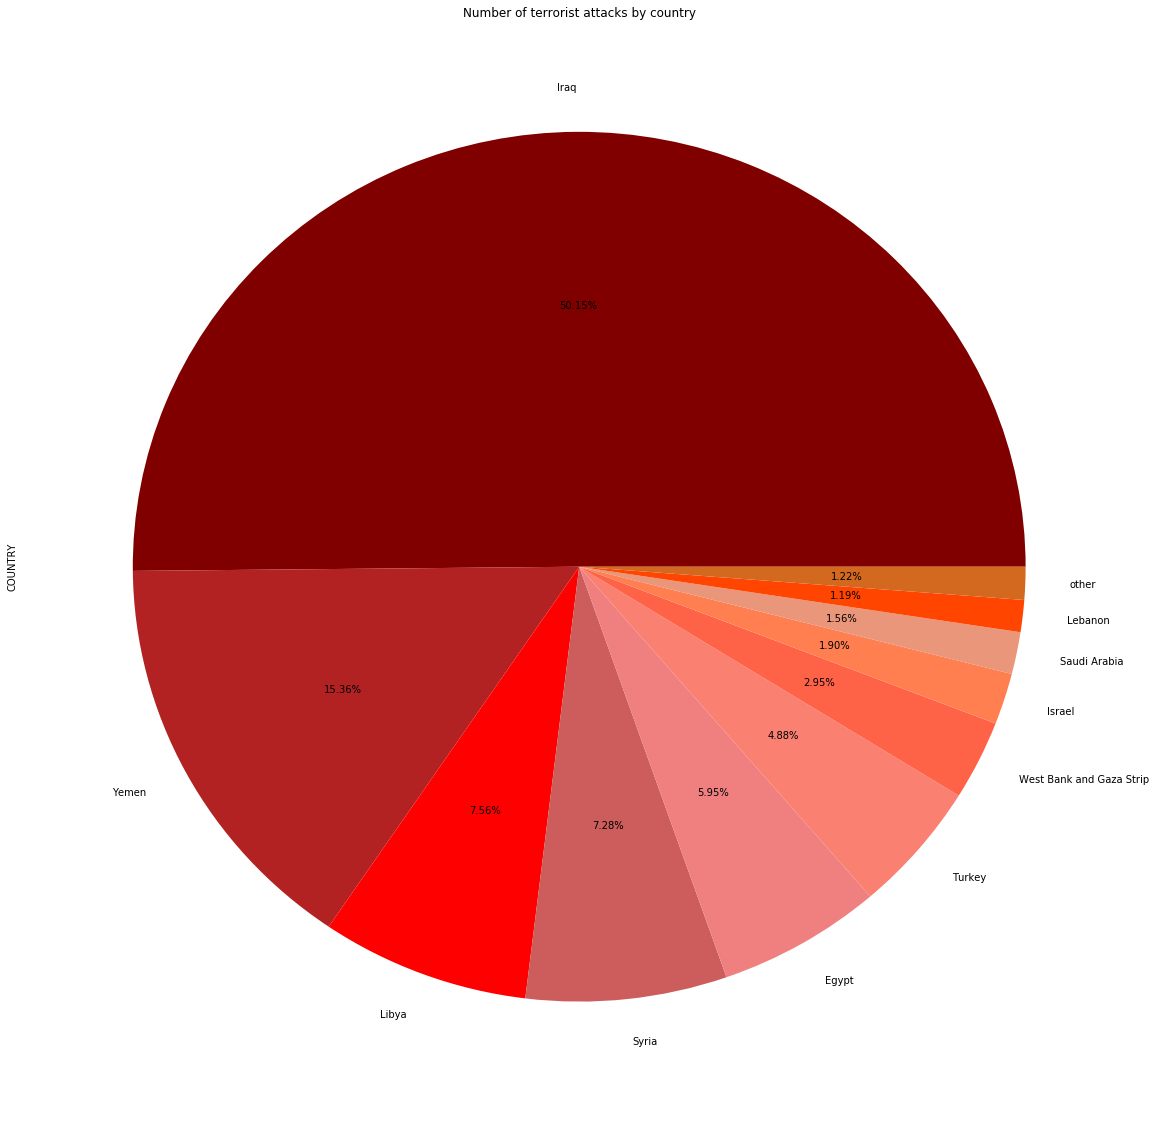

In [8]:
df2 = df["COUNTRY"].replace(dict_of_countries).value_counts()
df2["other"] = 0
count = 0  
count = df.shape[0]
remove = []
for COUNTRY in df2.index:
    pigoin = df2[COUNTRY]
    if(pigoin <= (count / 100)):
        remove.append(COUNTRY)
        df2["other"] = df2["other"] + pigoin 
    
df2 = df2.drop(index=remove)
df2.plot(kind='pie',figsize=(20, 20),autopct="%.2f%%",colors = Red_colors)
plt.title('Number of terrorist attacks by country')

Text(0.5,1,'Number of terrorist attacks by country')

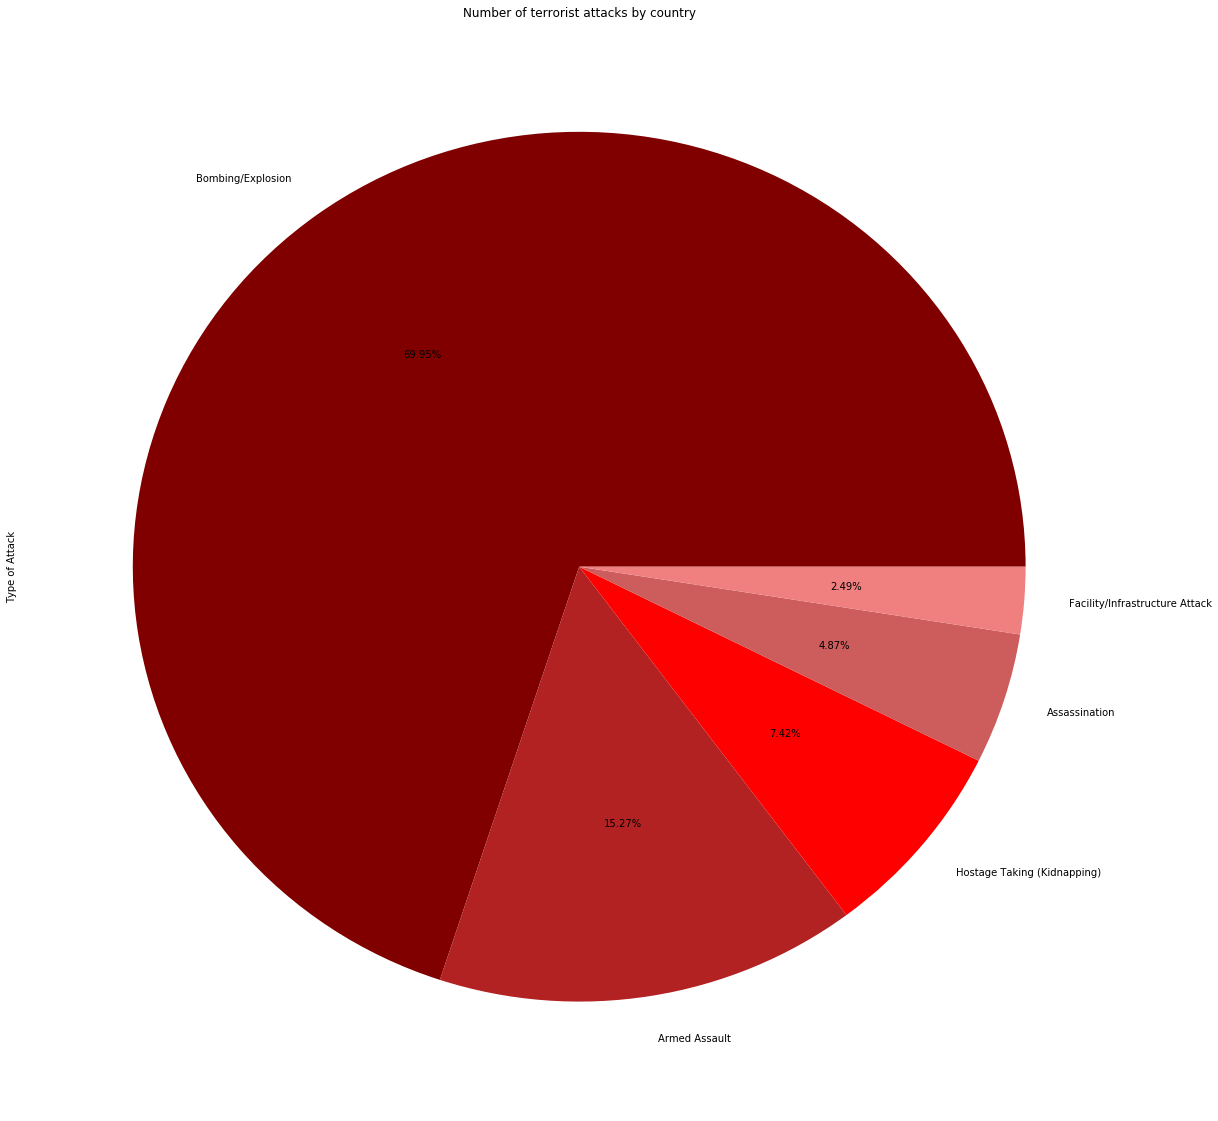

In [9]:
dict_of_Type_of_Attack = {0:"Bombing/Explosion",1:"Facility/Infrastructure Attack",2:"Armed Assault",3:"Hostage Taking (Kidnapping)",4:"Assassination",5:"Hostage Taking (Barricade Incident)",6:"Hijacking",7:"Unarmed Assault"}

df2 = df["Type of Attack"].replace(dict_of_Type_of_Attack).value_counts()
df2["other"] = 0
count = 0  
count = df.shape[0]
remove = []
for COUNTRY in df2.index:
    pigoin = df2[COUNTRY]
    if(pigoin <= (count / 100)):
        remove.append(COUNTRY)
        df2["other"] = df2["other"] + pigoin 
    
df2 = df2.drop(index=remove)
df2.plot(kind='pie',figsize=(20, 20),autopct="%.2f%%",colors = Red_colors)
plt.title('Number of terrorist attacks by country')


Text(0.5,1,'Number of terrorist attacks by Nationality of Target')

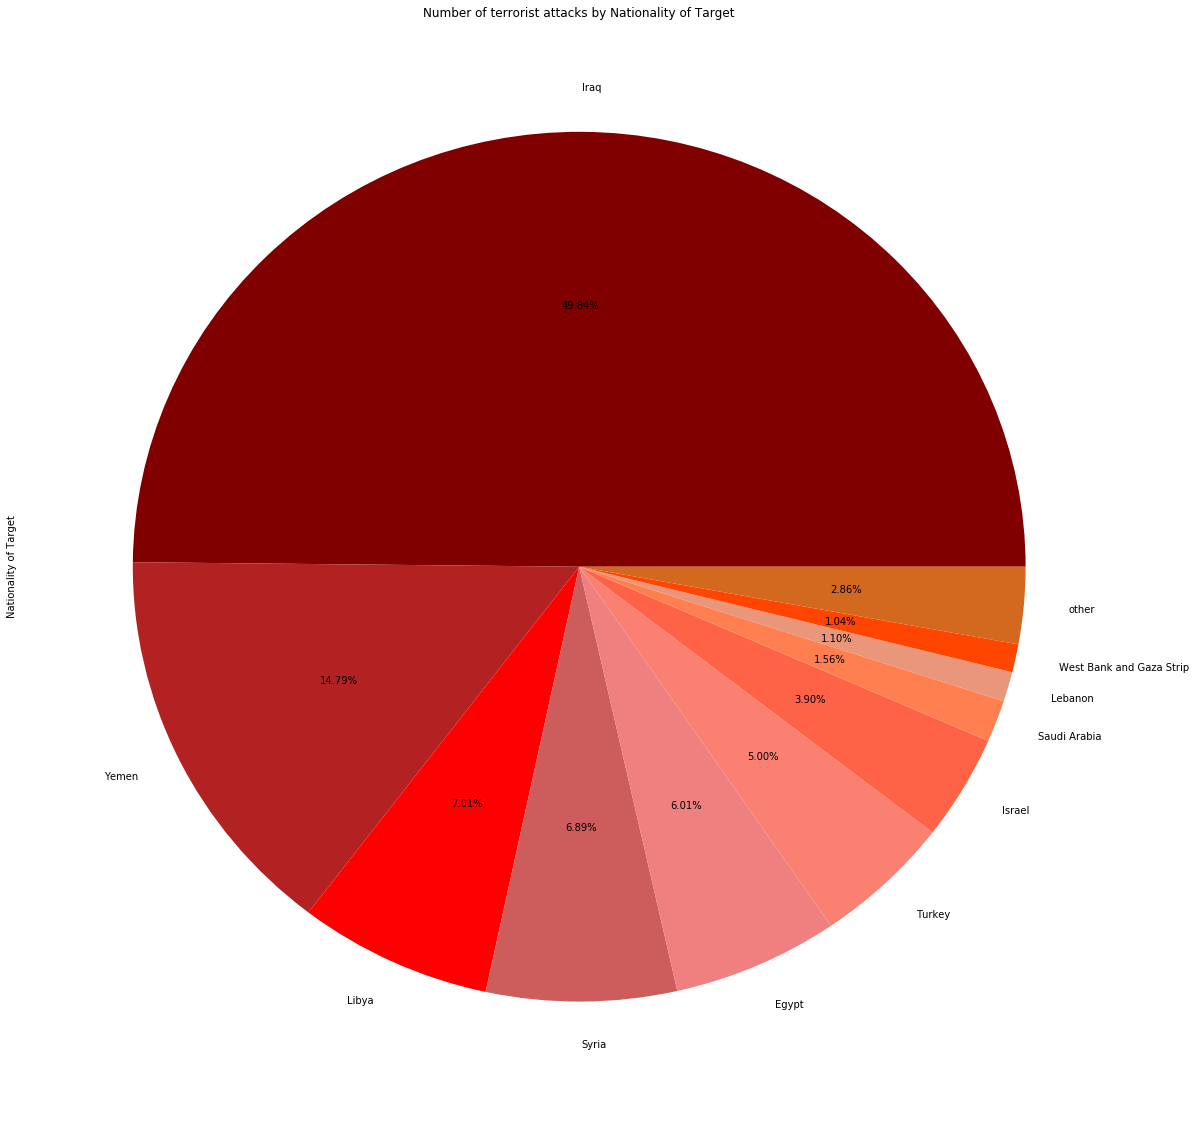

In [10]:
df4 = df["Nationality of Target"].value_counts()
df4["other"] = 0
count = df.shape[0]
remove = []
for Nationality in df4.index:
    pigoin = df4[Nationality]
    if(pigoin <= (count / 100)):
        remove.append(Nationality)
        df4["other"] = df4["other"] + pigoin 
    
df4 = df4.drop(index=remove)
df4.plot(kind='pie',figsize=(20, 20),autopct="%.2f%%",colors = Red_colors)
plt.title('Number of terrorist attacks by Nationality of Target')



Text(0.5,1,'The number of people killed or injured in terrorist acts')

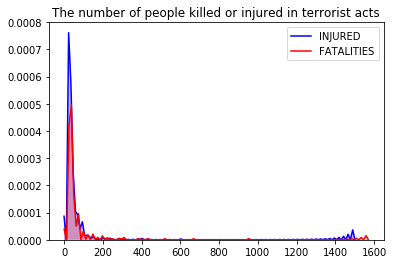

In [12]:
sns.kdeplot(df["INJURED"], shade=True,color = "b")
sns.kdeplot(df["FATALITIES"], shade=True,color = "r")
plt.title('The number of people killed or injured in terrorist acts')

Text(0.5,1,'The number of people killed or injured in terrorist acts(Up to 15 people )')

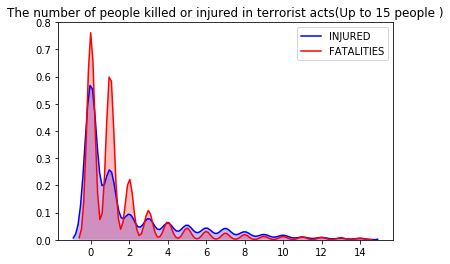

In [13]:
sns.kdeplot(df["INJURED"][df["INJURED"]<15], shade=True,color = "b")
sns.kdeplot(df["FATALITIES"][df["FATALITIES"]<15], shade=True,color = "r")
plt.title('The number of people killed or injured in terrorist acts(Up to 15 people )')

Text(0.5,1,'The relationship between the type of weapon and the type of attack')

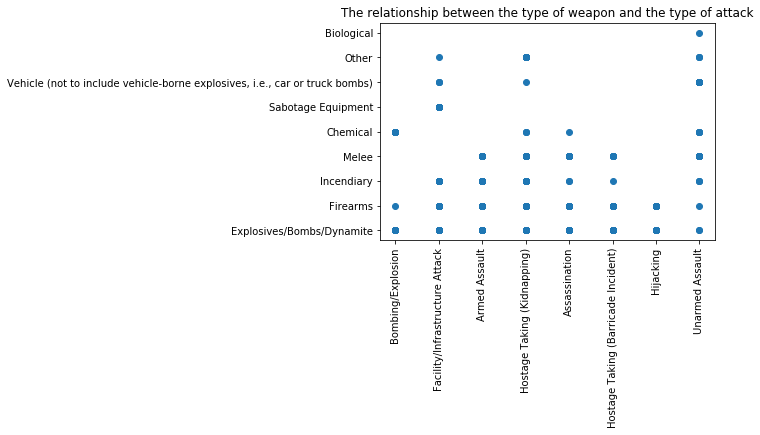

In [46]:
dict_of_Type_of_Attack = {0:"Bombing/Explosion",1:"Facility/Infrastructure Attack",2:"Armed Assault",3:"Hostage Taking (Kidnapping)",4:"Assassination",5:"Hostage Taking (Barricade Incident)",6:"Hijacking",7:"Unarmed Assault"}
xlabels = ["Bombing/Explosion","Facility/Infrastructure Attack","Armed Assault","Hostage Taking (Kidnapping)","Assassination","Hostage Taking (Barricade Incident)","Hijacking","Unarmed Assault"]
dict_of_Weaponֹ_Type = {0:"Explosives/Bombs/Dynamite",1:"Firearms",2:"Incendiary",3:"Melee",4:"Chemical",5:"Sabotage Equipment",6:"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",7:"Other",8:"Biological"}

plt.scatter(df["Type of Attack"].replace(dict_of_Type_of_Attack),df["Weapon Type"].replace(dict_of_Weaponֹ_Type))
plt.xlabel=("Type of Attack")
plt.ylabel=("Weapon Type")
plt.xticks( xlabels, rotation='vertical')
plt.title("The relationship between the type of weapon and the type of attack")

In [47]:
ct2 = pd.crosstab(df["FATALITIES"],df["Suicide_Attack"])



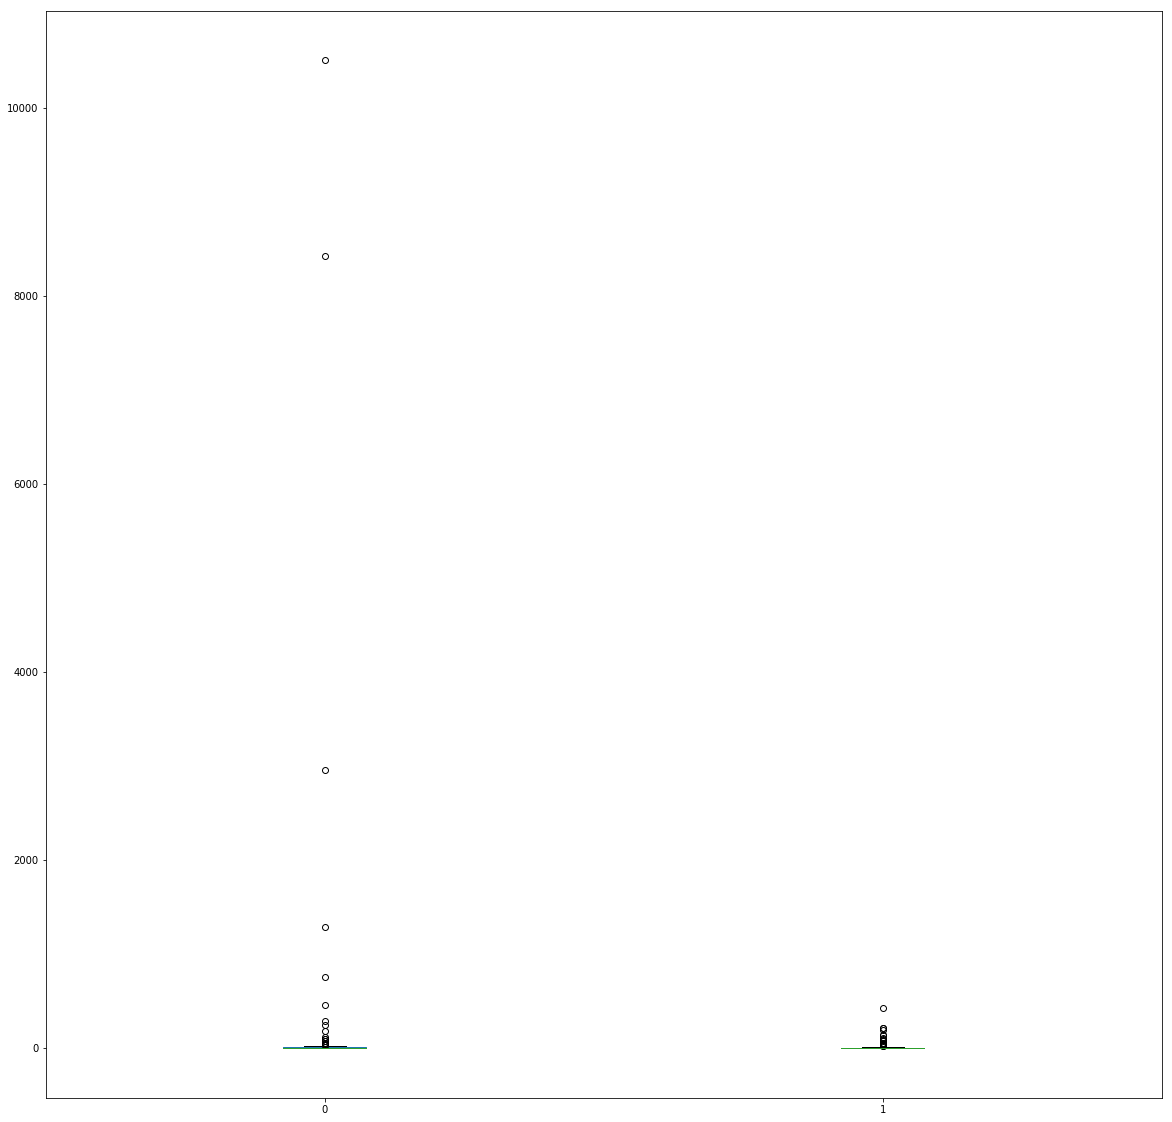

In [50]:
ct2.plot(kind="box",figsize=(20, 20))


##### Test using chi2 contingency test whether a connection between the number of deaths and the mother of the attack is suicide

In [17]:
if chi2_contingency(ct2)[1] >= 0.05:
    print("There is a link between the number of deaths and whether the attack is suicide")
else:
    print("There is no connection between the number of deaths and whether the attack is suicide")

There is no connection between the number of deaths and whether the attack is suicide


In [18]:
ct3 = pd.crosstab(df["Ransom"],df["Hostages"],normalize="index")

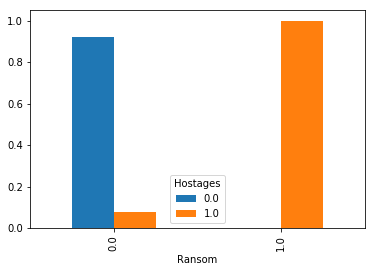

In [53]:
ct3.plot(kind="bar")

In [54]:
if chi2_contingency(ct3)[1] >= 0.05:
    print("There is a connection between demanding ransom and taking hostages")
else:
    print("There is no connection between demanding ransom and taking hostages")

There is a connection between demanding ransom and taking hostages


Text(0.5,1,'Amount of attacks by type of Attack')

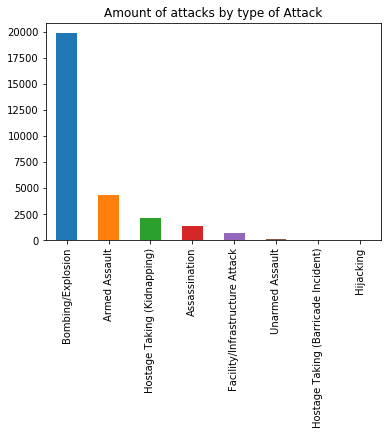

In [55]:
dict_of_Type_of_Attack = {0:"Bombing/Explosion",1:"Facility/Infrastructure Attack",2:"Armed Assault",3:"Hostage Taking (Kidnapping)",4:"Assassination",5:"Hostage Taking (Barricade Incident)",6:"Hijacking",7:"Unarmed Assault"}
xlabels = ["Bombing/Explosion","Facility/Infrastructure Attack","Armed Assault","Hostage Taking (Kidnapping)","Assassination","Hostage Taking (Barricade Incident)","Hijacking","Unarmed Assault"]

df["Type of Attack"].replace(dict_of_Type_of_Attack).value_counts().plot(kind='bar')
plt.title('Amount of attacks by type of Attack')
# plt.xticks(xlabels, rotation='vertical')


Text(0.5,1,'Amount of attacks by type of Weapon')

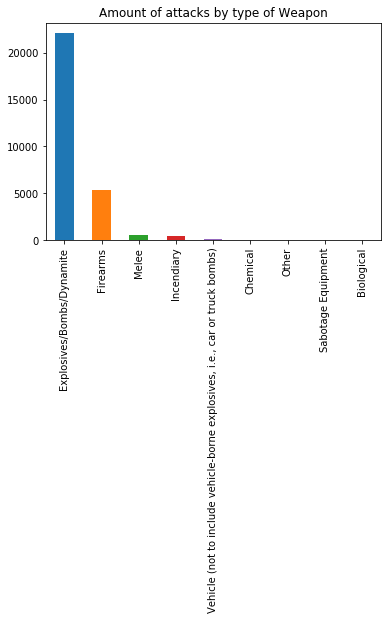

In [56]:
df["Weapon Type"].replace(dict_of_Weaponֹ_Type).value_counts().plot(kind='bar')
plt.title('Amount of attacks by type of Weapon')

Text(0.5,1,'Amount of attacks by sub type of Weapon')

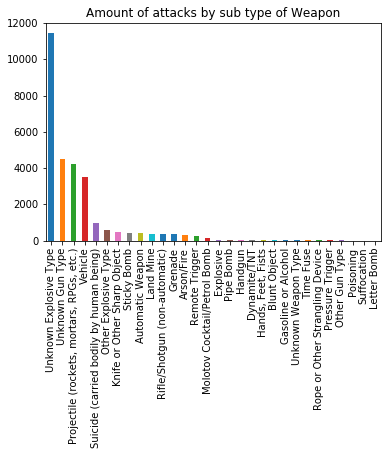

In [58]:
dict_of_Weaponֹ_Sub_Type = {0:"Unknown Explosive Type",1 : "Automatic Weapon",2 : "Unknown Gun Type",3 : "Projectile (rockets, mortars, RPGs, etc.)",4 : "Vehicle",5 : "Sticky Bomb",6 : "Land Mine",7 : "Remote Trigger",8 : "Rifle/Shotgun (non-automatic)",9 : "Suicide (carried bodily by human being)",10 : "Molotov Cocktail/Petrol Bomb",11 : "Knife or Other Sharp Object",12 : "Unknown Weapon Type",13 : "Arson/Fire",14 : "Grenade",15 : "Handgun",16 : "Other Explosive Type",17 : "Pipe Bomb",18 : "Blunt Object",19 : "Dynamite/TNT",20 : "Rope or Other Strangling Device",21 : "Time Fuse",22 : "Hands, Feet, Fists",23 : "Explosive",24 : "Poisoning",25 : "Pressure Trigger",26 : "Suffocation",27 : "Gasoline or Alcohol",28 : "Other Gun Type",29 : "Letter Bomb"}
df["Weapon Sub_type"].replace(dict_of_Weaponֹ_Sub_Type).value_counts().plot(kind='bar')
plt.title('Amount of attacks by sub type of Weapon')



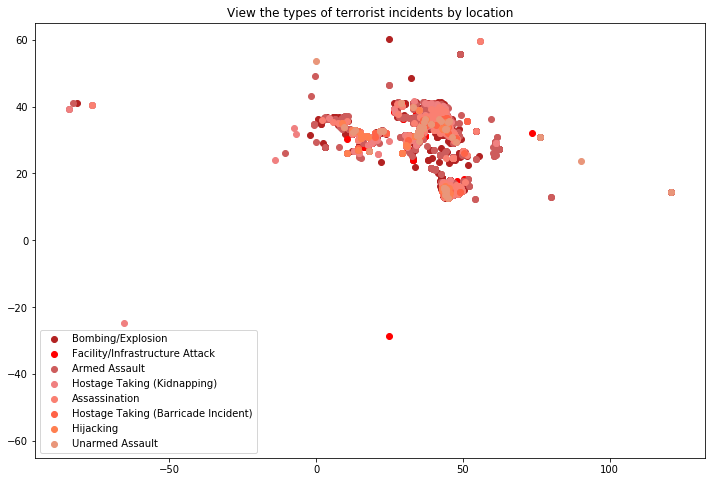

In [24]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_ylim(-65,65)
# ax.set_xlim(-90,90)

i = 1
for Type_of_Attack  in df["Type of Attack"].unique():
    ax.scatter(df.longitude[df["Type of Attack"] == Type_of_Attack],df.latitude[df["Type of Attack"] == Type_of_Attack], c=Red_colors[i],marker='o')
    i = i+1
ax.legend(labels=df["Type of Attack"].unique())
# colours_list = ['salmon','plum','navy','goldenrod','darkviolet','khaki','skyblue','black','orange','blue','pink','grey']
# colours_df = pd.DataFrame(index=range(12),columns=Red_colors)
# colours_df["Colour"] = colours_list
# for row in range(df.shape[0]):
#     ax.scatter(df.longitude,df.latitude, c=Red_colors)
# # ax.legend(labels=range(1000))
# plt.xlabel('longitude')
# plt.ylabel('latitude')
# ax.scatter(34.781769,32.085300,c ='b') #Tel Aviv
# ax.scatter(-67.186006,-54.749991,c ='b') 
# ax.scatter(95.638458,5.200365,c ='b')
plt.title('View the types of terrorist incidents by location')
ax.legend(labels=['Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hostage Taking (Kidnapping)', 'Assassination', 'Hostage Taking (Barricade Incident)', 'Hijacking', 'Unarmed Assault' ])

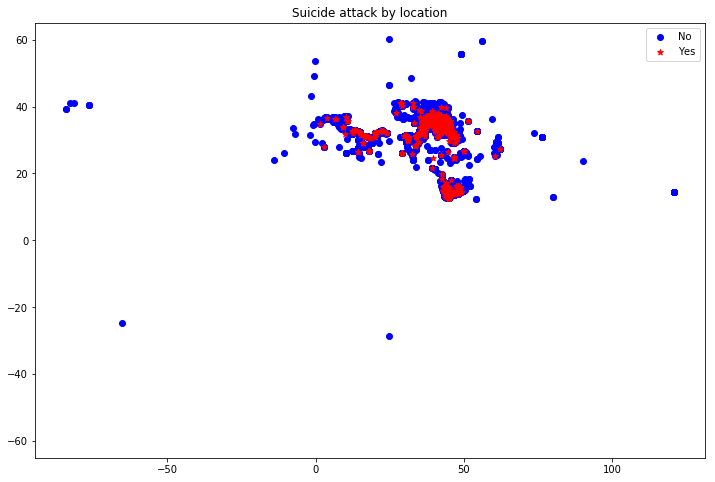

In [25]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_ylim(-65,65)
# ax.set_xlim(-90,90)

ax.scatter(df.longitude[df.Suicide_Attack == 0],df.latitude[df.Suicide_Attack == 0], c="b",marker='o')
ax.scatter(df.longitude[df.Suicide_Attack == 1],df.latitude[df.Suicide_Attack == 1], c="r",marker='*')

plt.title('Suicide attack by location')
ax.legend(labels=['No', 'Yes'])

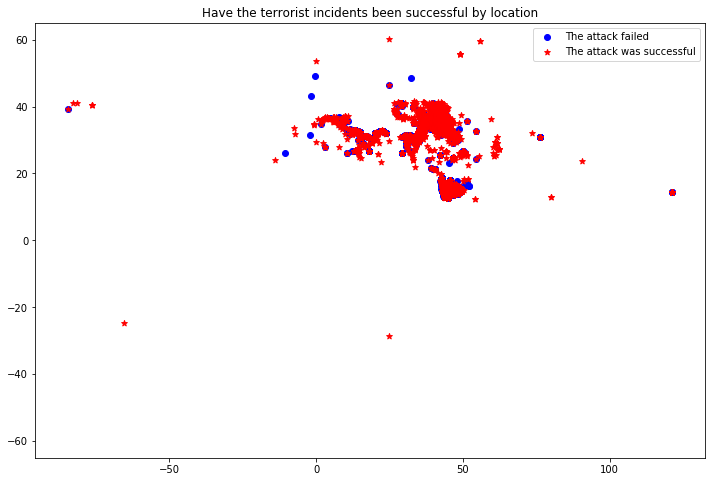

In [26]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_ylim(-65,65)
# ax.set_xlim(-90,90)

ax.scatter(df.longitude[df['Successful Attack?'] == 0],df.latitude[df['Successful Attack?'] == 0], c="b",marker='o',label='The attack failed')
ax.scatter(df.longitude[df['Successful Attack?'] == 1],df.latitude[df['Successful Attack?'] == 1], c="r",marker='*',label='The attack was successful')

plt.title('Have the terrorist incidents been successful by location')
ax.legend(labels=['The attack failed', 'The attack was successful'])

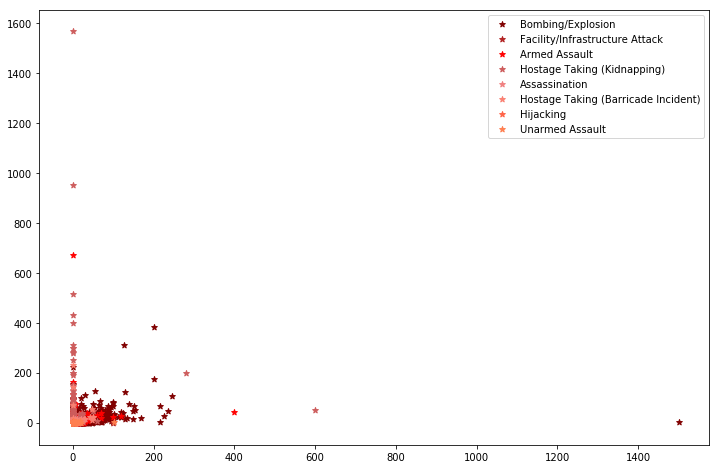

In [27]:
# from datetime import datetime
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
for i in range(len(df['Type of Attack'].unique())):
    plt.scatter(x=df[df['Type of Attack'] == i]["INJURED"],y=df[df['Type of Attack'] == i]["FATALITIES"],c=Red_colors[i],marker='*',label=df['Type of Attack'].unique()[i])
plt.legend(numpoints=1,loc=4)
# plt.xlabel("INJURED")
# plt.ylabel("FATALITIES")
ax.legend(labels=df["Type of Attack"].unique())
ax.legend(labels=['Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hostage Taking (Kidnapping)', 'Assassination', 'Hostage Taking (Barricade Incident)', 'Hijacking', 'Unarmed Assault' ])
plt.show()

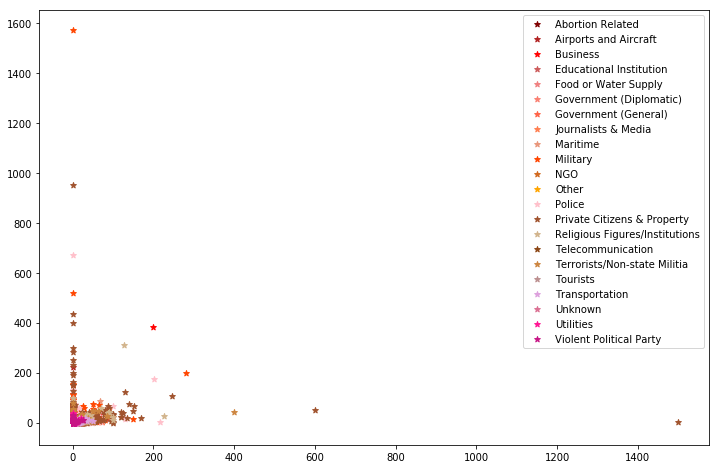

In [28]:
Target_Types = ['Abortion Related','Airports and Aircraft','Business', 'Educational Institution', 'Food or Water Supply', 'Government (Diplomatic)', 'Government (General)' ,'Journalists & Media', 'Maritime', 'Military', 'NGO', 'Other', 'Police',  'Private Citizens & Property', 'Religious Figures/Institutions', 'Telecommunication', 'Terrorists/Non-state Militia', 'Tourists', 'Transportation', 'Unknown', 'Utilities',  'Violent Political Party' ]
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
i = 0
for Type in Target_Types:
    plt.scatter(x=df[df['TARGET TYPE'] == Type]["INJURED"],y=df[df['TARGET TYPE'] == Type]["FATALITIES"],c=Red_colors[i],marker='*',label=Type)
    i = i+1
plt.legend(numpoints=1,loc=4)
# plt.xlabel("INJURED")
# plt.ylabel("FATALITIES")
ax.legend(labels=df["Type of Attack"].unique())
ax.legend(labels=Target_Types)
plt.show()

In [29]:
data = [0]*len(Target_Types)

ser = pd.Series(data, index =Target_Types)

for i in range(df.shape[0]):
    for Type in Target_Types:
        if (Type in df['TARGET TYPE'][i]):
            ser[Type] = ser[Type] + 1



Text(0.5,1,'Amount of attacks by Target Types')

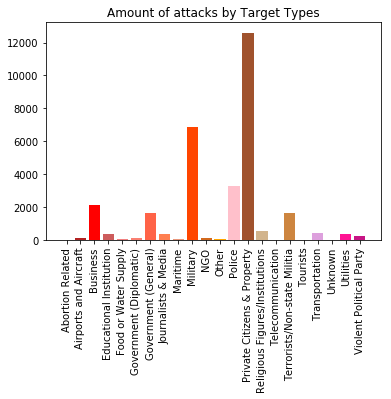

In [30]:
# ser.plot(kind='bar')
plt.bar(ser.index, ser, color=Red_colors)
plt.xticks( ser.index, rotation='vertical')

plt.title('Amount of attacks by Target Types')


In [31]:
Specific_Description_text = []
for i in range(df.shape[0]):
    txt = df['Specific Description'][i].strip().lower()
    if  type(txt) == type("string"):
        Specific_Description_text.append(txt)
text = " ".join(Specific_Description_text)


In [32]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

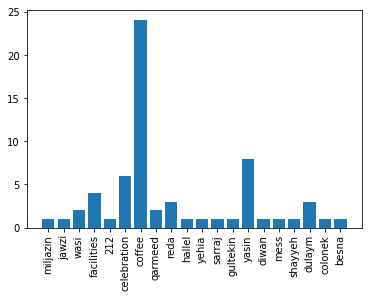

In [33]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

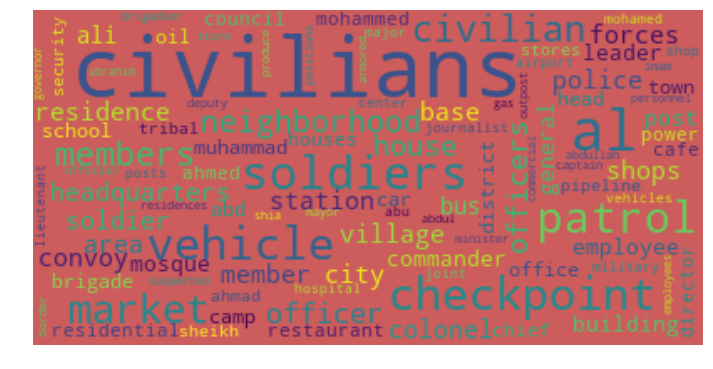

In [34]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="indianred").generate_from_frequencies(freqDist)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

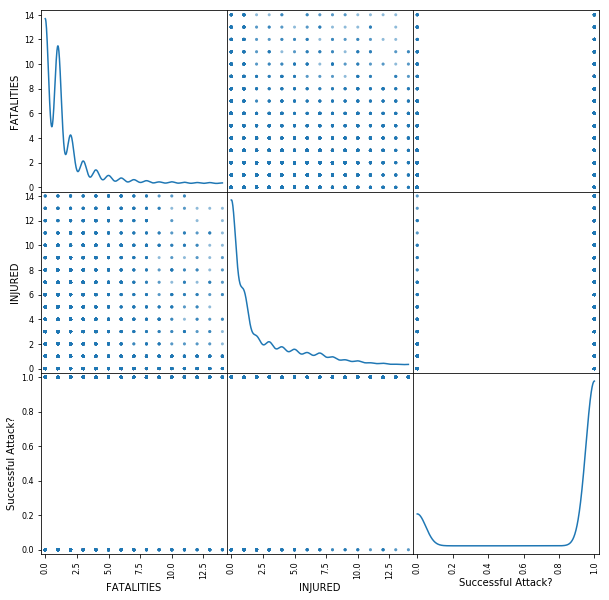

In [36]:
df1 = df[df["FATALITIES"]<15].copy()
df1 = df1[df1["INJURED"]<15]
pd.plotting.scatter_matrix(df1[[ 'FATALITIES', 'INJURED','Successful Attack?']], figsize=(10, 10), diagonal='kde')
plt.show()